In [1]:
# reading the file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# data exploration
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data encoding
from sklearn.preprocessing import LabelEncoder
        
# data visualization     
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data standardization
from sklearn.preprocessing import StandardScaler

# data modelling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# warnings
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
# read the csv file from the path
path = "/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv"
df = pd.read_csv(path, index_col=0)

In [3]:
# display first 5 rows
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


# Univariate Analysis

In [6]:
# check the descriptive analysis
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Figure size 432x288 with 0 Axes>

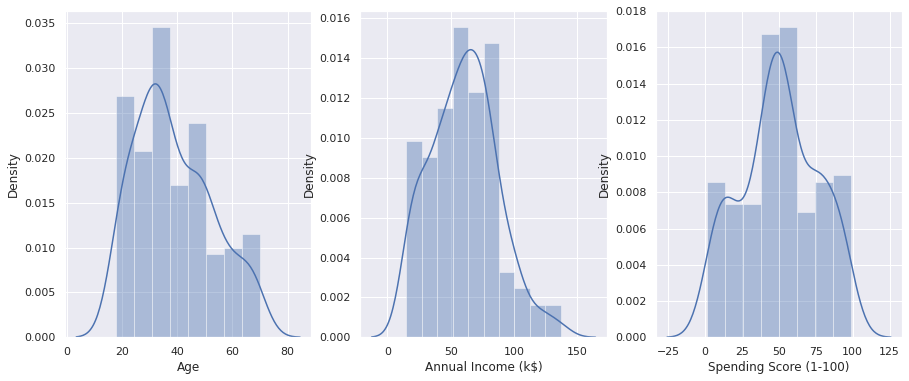

In [7]:
# checking for the numerical variables

col = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
    
fig=plt.figure()
fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (15,6))
for i, ax in zip(col, axes.flat):
    sns.distplot(df[i] , ax=ax)

plt.show();

From above:
1. There is steep rise in age but gradual decrease. This means that we have many people of mid and older years.
2. The annual income shows less people of high salary range compared to 50-60 kDollars per annum
3. The spending score is 30 to 60

<Figure size 432x288 with 0 Axes>

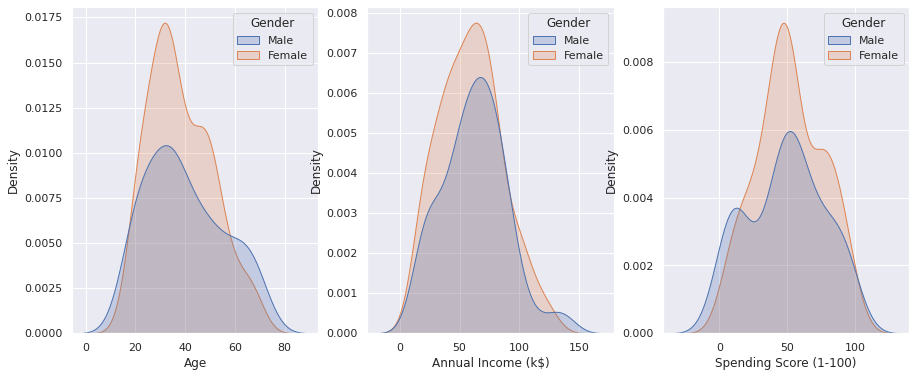

In [8]:
# Density as per the gender 
fig=plt.figure()
fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (15,6))
for i, ax in zip(col, axes.flat):
    sns.kdeplot(df[i],shade = True, hue = df["Gender"] , ax=ax)

plt.show();

From above:
1. Females of year from 30-40 years are predominantly present in data
2. The females with high annual income compared to male shops more
3. The spending score of Female is better than Male.

<Figure size 1080x432 with 0 Axes>

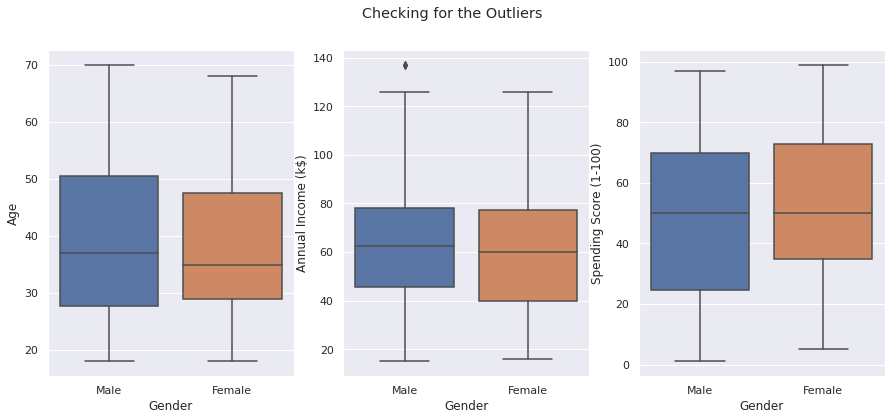

In [9]:
# checking for outliers
plt.rc('figure', figsize=(15, 6))  
fig=plt.figure()
fig , axes = plt.subplots(ncols = 3, nrows = 1)
for i, ax in zip (col, axes.flat):
    sns.boxplot( data = df, x = "Gender", y = df[i], ax = ax)
fig.suptitle('Checking for the Outliers')
plt.show();


From above:
1. Starting age of male amd female is nearly same.
2. The median age of male is greater than female
3. Age group of male is more than female
4. Male start shopping from less income range compared to female
5. Male shoppers has outliers when compared as per their income
6. Median annual income of male is slightly more than female
7. Spending score of female is higher than male
8. Median of spending score of male and female is nearly same
9. Female spending score is higher than male

In [10]:
# percentage of male and female in our data
df["Gender"].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

From above:
1. There are 56% of female and 44% of male in data

# Bivariate Analysis

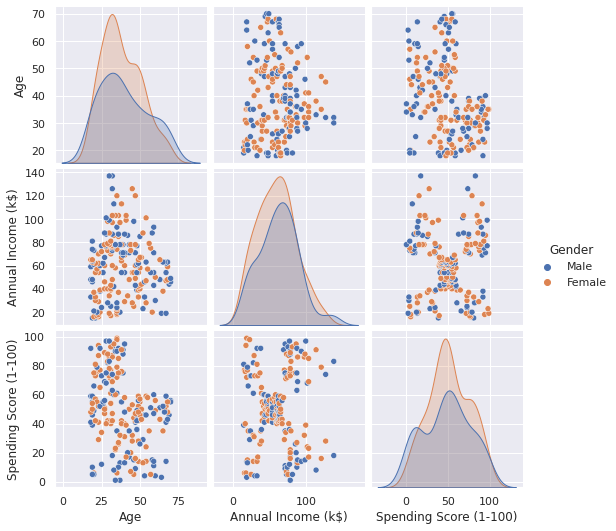

In [11]:
# checking the relationship between the different variables according to gender
sns.pairplot(df, hue = "Gender")

From above :
1. We can see the cluster between the Annual Income and spending score
2. The relationship between the age, annual income and spending income is not clear

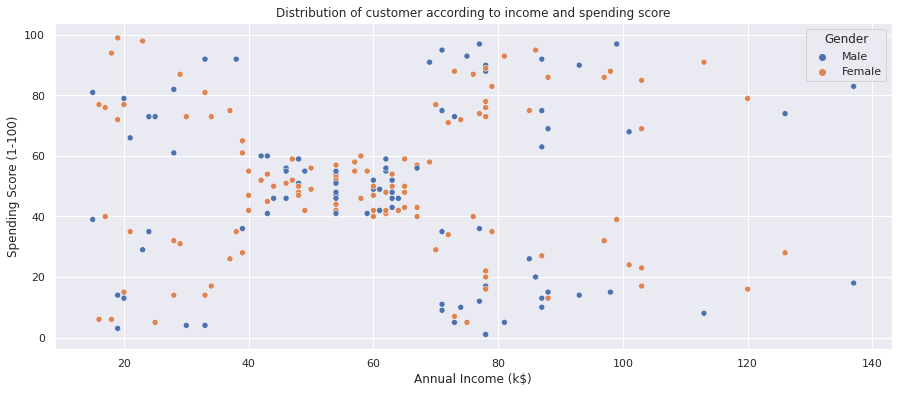

In [12]:
# let us check the spending score as per the annual income
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")
plt.title("Distribution of customer according to income and spending score");

From above:
1. We can see 5 clusters in the plot above. 
2. The desired cluster is high income and high spending score

In [13]:
# checking the statistic as per the gender
df.groupby("Gender").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


From above:
1. The mean age of male and female is nearly same
2. Average annual income of male is more than female
3. However, the mean of spending score of female is more than male

In [14]:
# checking the correlation between features
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

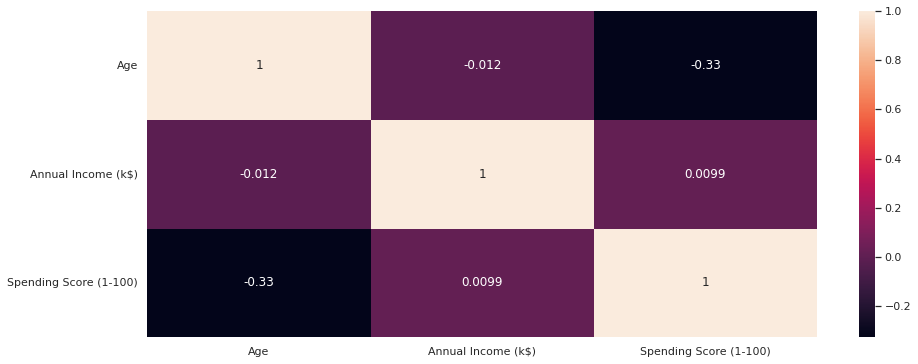

In [15]:
# Creating the heatmap
sns.heatmap(df.corr(), annot = True)

From above:
1. The Age has negative correlation with spending score and income.
2. This means that older people spends less
3. The annual income decrease with the increase in age
4. The only positive correlation is between annual income and spending score.
5. However the value is still small.

# Modelling - Univariate, Bivariate, Multivariate analysis


### Univariate and Bivariate Analysis

In [16]:
# finding the optimal value of inertia for determining the number of clusters for univariate
inertia_scores_uni = []
for i in range(1, 11):
    cluster_uni = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_uni.fit( df[["Annual Income (k$)"]])
    inertia_scores_uni.append(cluster_uni.inertia_)
    
    
# finding the optimal value of inertia for determining the number of clusters for bivariate
inertia_scores_bi = []
for i in range(1, 11):
    cluster_bi = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_bi.fit( df[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_scores_bi.append(cluster_bi.inertia_)

Text(0.5, 1.0, 'Checking the optimal number of clusters')

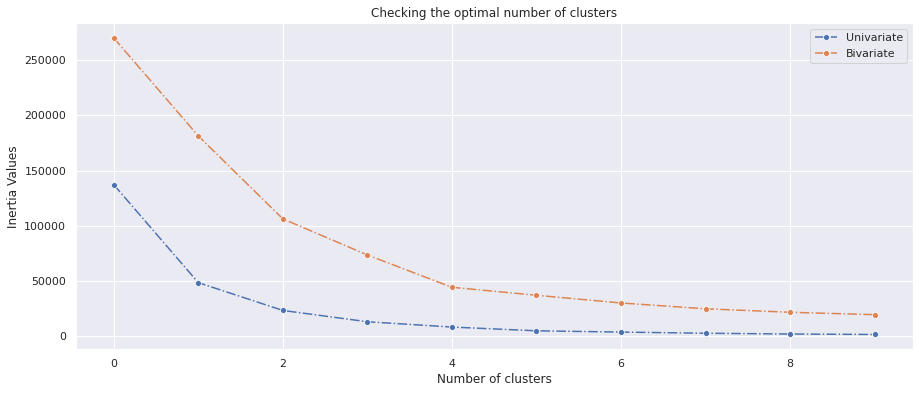

In [17]:
fig, ax = plt.subplots(1,1)
ax = sns.lineplot(data = inertia_scores_uni,  label = "Univariate", marker = 'o', linestyle = '-.')
ax = sns.lineplot(data = inertia_scores_bi, label = "Bivariate", marker = 'o', linestyle = '-.')
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia Values")
plt.title("Checking the optimal number of clusters")

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. The low the value of inertia the compact is the cluster and desired is the result. <br>


In the elbow method, we plot the mean distance and look for the elbow point where the rate of decrease shifts. This elbow point can be used to determine K. Elbow point is used as a cutoff point in mathematical optimization to decide at which point the diminishing returns are no longer worth the additional cost. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.However, if the data is not clustered then this method does not work well.<br>

From above:
1. The inertia value for the univariate is less than bivariate
2. As per the elbow method the optimal value for univariate is 2 and for bivariate is 4

In [18]:
# fitting the univariate model
cluster_uni = KMeans(n_clusters = 2)
cluster_uni.fit(df[["Annual Income (k$)"]])

# checking inertia value
print("Inertia value for univariate:", cluster_uni.inertia_)

# creating the cluster column
df["Income Cluster_uni"] = cluster_uni.labels_

# fitting the bivariate model
cluster_bi = KMeans(n_clusters = 4)
cluster_bi.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
df["Income Cluster_bi"] = cluster_bi.labels_ 

# checking inertia value
print("Inertia value for bivariate:", cluster_bi.inertia_)

# creating the cluster column
df["Income Cluster_bi"] = cluster_bi.labels_

Inertia value for univariate: 48660.88888888889
Inertia value for bivariate: 73679.78903948834


In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster_uni,Income Cluster_bi
CustomerID,,,,,,
1,Male,19,15,39,0,1
2,Male,21,15,81,0,3
3,Female,20,16,6,0,1
4,Female,23,16,77,0,3
5,Female,31,17,40,0,1


In [20]:
# checking mean as per univariate
df[["Age", "Annual Income (k$)","Spending Score (1-100)", "Income Cluster_uni"]].groupby("Income Cluster_uni").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster_uni,,,
0,40.033333,37.288889,50.288889
1,37.881818,79.600000,50.127273


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

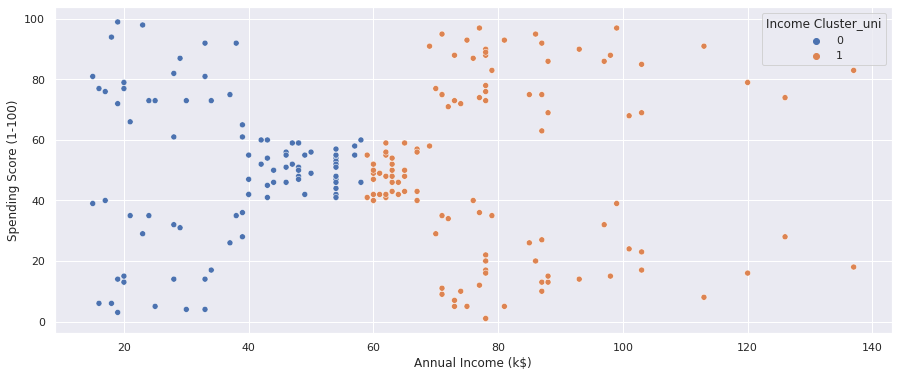

In [21]:
# plot showing the cluster
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)",  hue = "Income Cluster_uni")

From above:
1. Cluster 0 have high age, low earners with spending score nearly the same as cluster 1.
2. Cluster 1 has low age, high income but the spending score is nearly same as cluster 0.

In [22]:
# checking mean as per bivariate
df.groupby("Income Cluster_bi").mean()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster_uni
Income Cluster_bi,,,,
0,32.692308,86.538462,82.128205,1.00
1,45.217391,26.304348,20.913043,0.00
2,40.394737,87.000000,18.631579,1.00
3,39.200000,48.260000,56.480000,0.33


In [23]:
# finding the center of the clusters 
centers = pd.DataFrame(cluster_bi.cluster_centers_)
centers.columns = ["x", "y"]

Text(0.5, 1.0, 'Clusters with the centroid')

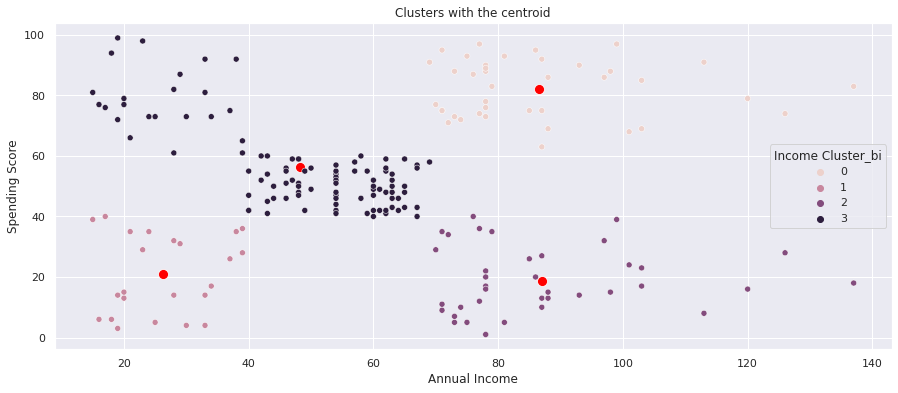

In [24]:
# clusters with the centroid 
fig, ax = plt.subplots(1,1)
ax = sns.scatterplot(data = df, x = centers["x"], y = centers["y"], color = "red", s = 100)
ax = sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Income Cluster_bi")

ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
plt.title("Clusters with the centroid")

From above:
1. There are 4 clusters
2. The cluster 0 is high income and high spending group.
3. Cluster 1 is not a favourable group as it is low income and low spending group.
4. However for the cluster 3 we see that 2 groups are merged together.
5. Focus on cluster 2 must be done as they have high annual income but low spending score

In [25]:
# The percentage of male and female in each group
pd.crosstab(df["Income Cluster_bi"], df["Gender"], normalize = "index")

Gender,Female,Male
Income Cluster_bi,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.473684,0.526316
3,0.590000,0.410000


From above:
1. Cluster 0 is the balanced group. This is high income and high spending group
2. The cluster 1 has 60% of female. Surpisingly, this is low income and low spending group
3. This group also has the balanced ratio. 
4. This group is high income but low spending group. This group should be explore as how to increase their spending score as they have the capacity to spend more.

### Multivariate analysis

In [26]:
# converting the categorical values into binary values
df_scale = pd.get_dummies(df, drop_first=True)
df_scale.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster_uni,Income Cluster_bi,Gender_Male
CustomerID,,,,,,
1,19,15,39,0,1,1
2,21,15,81,0,3,1
3,20,16,6,0,1,0
4,23,16,77,0,3,0
5,31,17,40,0,1,0


In [27]:
# selecting the desired columns
df_scale = df_scale[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', "Gender_Male"]]
df_scale.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [28]:
df_scale.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'], dtype='object')

In [29]:
df_multi = df_scale.copy()

In [30]:
# Scaling the values of different features to make them come in same scale range
scaler = StandardScaler()

df_multi = pd.DataFrame(scaler.fit_transform(df_scale))
df_multi.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [31]:
# finding the optimal value of inertia for determining the number of clusters for multivariate
inertia_scores_multi = []
for i in range(1, 11):
    cluster_multi = KMeans(n_clusters = i,  init = 'k-means++', random_state = 42)
    cluster_multi.fit( df_multi)
    inertia_scores_multi.append(cluster_multi.inertia_)
inertia_scores_multi

[800.0,
 588.8026767824936,
 476.78755441351586,
 386.71478577406873,
 325.1099834895344,
 275.8588431130499,
 236.2049470708688,
 199.7166255966767,
 174.1930957085769,
 152.08676298710694]

Text(0.5, 1.0, 'Checking the optimal number of clusters')

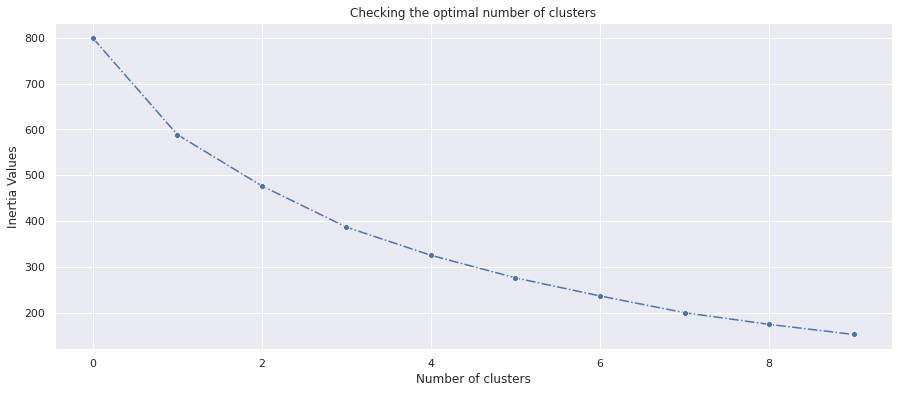

In [32]:
# using elbow method to check the optimal number of cluster

sns.lineplot(data = inertia_scores_multi, marker = 'o', linestyle = '-.')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia Values")
plt.title("Checking the optimal number of clusters")

From above:
1. The number of clusters are 3

In [33]:
# fitting the model
cluster_multi = KMeans(n_clusters = 3)
cluster_multi.fit(df_multi)
df_multi["Income Cluster_multi"] = cluster_multi.labels_ 
df_scale["Income Cluster_multi"] = cluster_multi.labels_ 

In [34]:
df_multi.columns

Index([0, 1, 2, 3, 'Income Cluster_multi'], dtype='object')

In [35]:
df_multi.rename(columns = {
    0: 'Age',
    1: 'Annual Income (k$)',
    2: 'Spending Score (1-100)',
    3: 'Gender_Male'
}, inplace = True)

df_multi.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Income Cluster_multi
0,-1.424569,-1.738999,-0.434801,1.128152,1
1,-1.281035,-1.738999,1.195704,1.128152,1
2,-1.352802,-1.700830,-1.715913,-0.886405,2
3,-1.137502,-1.700830,1.040418,-0.886405,1
4,-0.563369,-1.662660,-0.395980,-0.886405,2


Text(0.5, 1.0, 'Clusters with the centroid')

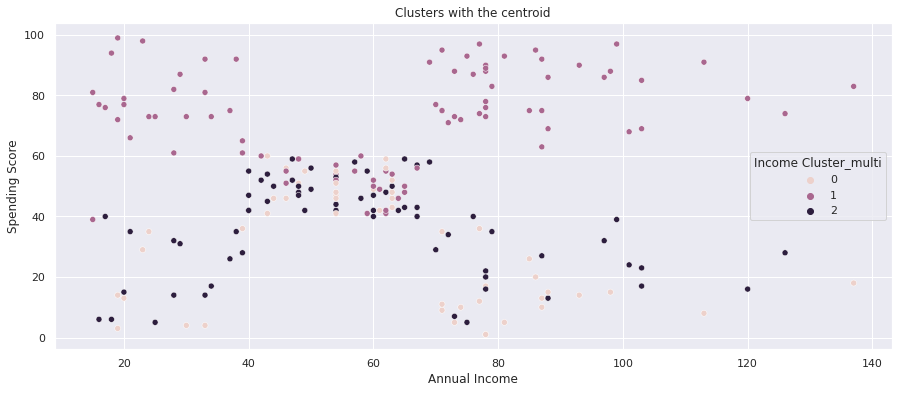

In [36]:
ax = sns.scatterplot(data = df_scale, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Income Cluster_multi")

ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
plt.title("Clusters with the centroid")

With multivariate analysis we see that clusters are not seperated clearly.

In [37]:
# descriptive analysis of different clusters
df_multi.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Income Cluster_multi
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16,3.108624e-17,1.085000
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,0.755399
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,-8.864053e-01,0.000000
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,-8.864053e-01,1.000000
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,-8.864053e-01,1.000000
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.128152e+00,2.000000
max,2.235532e+00,2.917671e+00,1.894492e+00,1.128152e+00,2.000000


In [38]:
df_multi.groupby("Income Cluster_multi").mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Income Cluster_multi,,,,
0,0.743078,0.064312,-0.794495,1.128152
1,-0.775291,0.046881,0.880564,0.037921
2,0.446802,-0.108124,-0.544208,-0.886405


Next step is to use PCA to analyze the results more effectively.